# Projeto 2 - NLP

-----

Nome: Victor Barros e Silva dos Reis
Turma: 781

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 23/02/2022;


- Aula de monitoria: 09/03/2022;


- Data de entrega: 14/03/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

## Table of Contents:
* [Análise de consistência dos dados](#first-bullet)
* [Análise Exploratória dos Dados](#second-bullet)
* [Pré-processamento e transformações](#third-bullet)
* [Treinamento do modelo](#fourth-bullet)
* [Conclusões](#fifth-bullet)

## Análise de consistência dos dados <a class="anchor" id="first-bullet"></a>

Nesta etapa carregaremos e analisaremos nossos dados a fim de entender o formato, as colunas, e tratar possíveis problemas de valores nulos ou inconsistentes.

In [1]:
# imports gerais
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords 
import emoji
import re
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

# imports de modelos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from gensim.models import doc2vec


# imports de métricas/tools
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV

random_state=42

In [2]:
df = pd.read_csv('Train3Classes.csv')
df.head()

id                                         tweet_text  \
0  1049721159292346368  Rio elege maior bancada policial de sua histór...   
1  1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
2  1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
3  1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4  1047326854229778432                         @SiCaetano_ viva o caos :)   

                       tweet_date  sentiment query_used  
0  Tue Oct 09 18:00:01 +0000 2018          2      folha  
1  Sun Sep 30 04:11:28 +0000 2018          0         :(  
2  Mon Sep 17 17:44:06 +0000 2018          2      exame  
3  Tue Oct 02 01:37:06 +0000 2018          0         :(  
4  Wed Oct 03 03:25:55 +0000 2018          1         :)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


#### Análise de ids e textos duplicados
Percebe-se que há ids com tweets duplicados, e, com exceção de 1, todos possuem o mesmo sentimento, portanto iremos removê-los neste momento.

In [4]:
df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id', ascending=False)

id                                         tweet_text  \
34464  1050747512179576834  era para ser somente algo normal, sem perceber...   
48967  1050747512179576834  era para ser somente algo normal, sem perceber...   
87130  1043522812634267648  Veja o que é #FATO ou #FAKE na entrevista de M...   
65328  1043522812634267648  Veja o que é #FATO ou #FAKE na entrevista de M...   
39007  1042890896163790848  Veja o que é #FATO ou #FAKE na entrevista de F...   
4777   1042890896163790848  Veja o que é #FATO ou #FAKE na entrevista de F...   
28564  1040952020990128129  Veja o que é #FATO ou #FAKE na entrevista de F...   
66221  1040952020990128129  Veja o que é #FATO ou #FAKE na entrevista de F...   
30744  1040377082189172738  Veja o que é #FATO ou #FAKE na sabatina de Ger...   
32410  1040377082189172738  Veja o que é #FATO ou #FAKE na sabatina de Ger...   
18026  1039987011904462849  Veja o que é #FATO ou #FAKE na sabatina de Cir...   
68291  1039987011904462849  Veja o que é #FATO ou #FAKE na sabatina de Cir...   
17419  1039617074081849345  Veja o que é #FATO ou #FAKE na sabatina de Mar...   
42936  1039617074081849345  Veja o que é #FATO ou #FAKE na sabatina de Mar...   
21547  1039333665304588296  Veja o que é #FATO ou #FAKE na entrevista de A...   
56550  1039333665304588296  Veja o que é #FATO ou #FAKE na entrevista de A...   
62236  1038570177191993344  Veja o que é #FATO ou #FAKE na entrevista de H...   
93665  1038570177191993344  Veja o que é #FATO ou #FAKE na entrevista de H...   
35849  1038494427503837185  Veja o que é #FATO ou #FAKE na entrevista de H...   
69100  1038494427503837185  Veja o que é #FATO ou #FAKE na entrevista de H...   
39324  1038222887432273920  Veja o que é #FATO ou #FAKE na entrevista de F...   
83565  1038222887432273920  Veja o que é #FATO ou #FAKE na entrevista de F...   
35012  1037837855433928704  Veja o que é #FATO ou #FAKE na entrevista de E...   
20226  1037837855433928704  Veja o que é #FATO ou #FAKE na entrevista de E...   
38913  1037082879438729216  O que é #FATO ou #FAKE na entrevista de Gerald...   
39184  1037082879438729216  O que é #FATO ou #FAKE na entrevista de Gerald...   

                           tweet_date  sentiment    query_used  
34464  Fri Oct 12 13:58:23 +0000 2018          2     #trabalho  
48967  Fri Oct 12 13:58:23 +0000 2018          1            :)  
87130  Sat Sep 22 15:30:00 +0000 2018          2         #fato  
65328  Sat Sep 22 15:30:00 +0000 2018          2  jornaloglobo  
39007  Thu Sep 20 21:39:00 +0000 2018          2         #fato  
4777   Thu Sep 20 21:39:00 +0000 2018          2  jornaloglobo  
28564  Sat Sep 15 13:14:36 +0000 2018          2         #fato  
66221  Sat Sep 15 13:14:36 +0000 2018          2  jornaloglobo  
30744  Thu Sep 13 23:10:00 +0000 2018          2         #fato  
32410  Thu Sep 13 23:10:00 +0000 2018          2  jornaloglobo  
18026  Wed Sep 12 21:20:00 +0000 2018          2         #fato  
68291  Wed Sep 12 21:20:00 +0000 2018          2  jornaloglobo  
17419  Tue Sep 11 20:50:00 +0000 2018          2  jornaloglobo  
42936  Tue Sep 11 20:50:00 +0000 2018          2         #fato  
21547  Tue Sep 11 02:03:50 +0000 2018          2  jornaloglobo  
56550  Tue Sep 11 02:03:50 +0000 2018          2         #fato  
62236  Sat Sep 08 23:30:00 +0000 2018          2         #fato  
93665  Sat Sep 08 23:30:00 +0000 2018          2  jornaloglobo  
35849  Sat Sep 08 18:29:00 +0000 2018          2  jornaloglobo  
69100  Sat Sep 08 18:29:00 +0000 2018          2         #fato  
39324  Sat Sep 08 00:30:00 +0000 2018          2  jornaloglobo  
83565  Sat Sep 08 00:30:00 +0000 2018          2         #fato  
35012  Thu Sep 06 23:00:01 +0000 2018          2         #fato  
20226  Thu Sep 06 23:00:01 +0000 2018          2  jornaloglobo  
38913  Tue Sep 04 21:00:01 +0000 2018          2  jornaloglobo  
39184  Tue Sep 04 21:00:01 +0000 2018          2         #fato

In [5]:
df = df.drop_duplicates(subset = ["id"])

Existem também tweets repetidos, que expressam o mesmo sentimento. Neste caso também removeremos os duplicados para não enviesar os modelos.

In [6]:
df[df.duplicated(subset=['tweet_text'], keep=False)].sort_values(by='tweet_text', ascending=False)

id                                         tweet_text  \
61094  1043909701140959232  😱NOVOS FILMES E SÉRIES ESTÃO CHEGANDO NA NETFL...   
7137   1043907817550295043  😱NOVOS FILMES E SÉRIES ESTÃO CHEGANDO NA NETFL...   
89198  1046657747306127360                               vou tentar dormir :(   
59243  1049173804612800514                               vou tentar dormir :(   
39346  1046736519636144135                                          voltei :)   
...                    ...                                                ...   
66845  1048211326173151232     #FollowFriday Todos os meus seguidores. :) #ff   
36591  1045363120120745984  #CulturalSpam serale... #notizie #curiose, #in...   
26627  1049314705863598080  #CulturalSpam serale... #notizie #curiose, #in...   
74342  1049661470877908992  "Em recuperação judicial, Eternit vê receita c...   
39383  1049701870124584961  "Em recuperação judicial, Eternit vê receita c...   

                           tweet_date  sentiment query_used  
61094  Sun Sep 23 17:07:22 +0000 2018          2   #noticia  
7137   Sun Sep 23 16:59:53 +0000 2018          2   #noticia  
89198  Mon Oct 01 07:07:07 +0000 2018          0         :(  
59243  Mon Oct 08 05:45:02 +0000 2018          0         :(  
39346  Mon Oct 01 12:20:08 +0000 2018          1         :)  
...                               ...        ...        ...  
66845  Fri Oct 05 14:00:29 +0000 2018          1         :)  
36591  Thu Sep 27 17:22:44 +0000 2018          1         :)  
26627  Mon Oct 08 15:04:55 +0000 2018          1         :)  
74342  Tue Oct 09 14:02:51 +0000 2018          2  #trabalho  
39383  Tue Oct 09 16:43:23 +0000 2018          2  #trabalho  

[1274 rows x 5 columns]

In [7]:
df = df.drop_duplicates(subset = ["tweet_text"])

Além disso, iremos transformar os ids em nossas chaves do dataframe, pois eles não terão utilidade para o modelo:

In [8]:
df.set_index('id',inplace=True)

#### Análise de nulos

In [9]:
df.isna().sum()

tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

## Análise Exploratória dos Dados <a class="anchor" id="second-bullet"></a>

In [10]:
df['sentiment'].value_counts()

2    31456
0    31448
1    31280
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

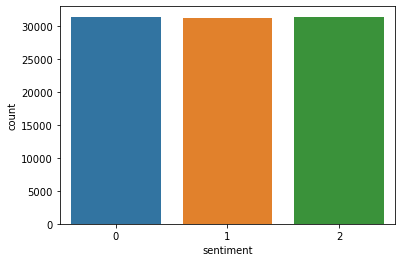

In [11]:
sns.countplot(data=df, x='sentiment')

Percebe-se que o target é bem balanceado, portanto não precisaremos tratar desbalanceamentos futuramente.

#### Identificando caracteres especias e importantes
Prontamente, como se trata de tweets, as hastags são de extrema importância, portanto devemos nos certificar que iremos mantê-las no treinamento do modelo, removendo apenas o caractere "#".

O "@" indica menções a outros perfis, mas nesse caso não indica sentimento e não agrega para o modelo, portanto iremos removê-las.

Há também ocorrência de emojis em sua forma de desenho, portanto podemos transformá-los em texto com a função "demojize" da lib *emoji*.

Por fim, há diversas ocorrências de emotes/emojis simples de carinhas tristes ou felizes, como ":)" e ":D", portanto serão um forte indicativo de sentimento!

In [12]:
df[df['tweet_text'].str.contains(':')]['tweet_text']

id
1049721159292346368    Rio elege maior bancada policial de sua histór...
1046251157025423360    fiquei tão triste quando eu vi o preço da câme...
1041744620206653440    Para Theresa May, seu plano para o Brexit é a ...
1046937084727107589    caralho eu quero proteger a danielly em um pot...
1047326854229778432                           @SiCaetano_ viva o caos :)
                                             ...                        
1041831666883321856    Cuba e defensor de direitos humanos se unem co...
1032352892194369536    #Oportunidade ➡️ Venha fazer parte da nossa eq...
1046785538542440448    @96syoo EU SEI 😭😭 é por isso que significa mui...
1045457469110177792              @louistsexhes N te conheço mas posta :D
1046239135286136832                  meu deus :( https://t.co/BlXazxZeKq
Name: tweet_text, Length: 92010, dtype: object

#### Influência da coluna 'query_used'
Considerando que esta coluna retorna tweets que contém a string pesquisada, é bem claro que grande parte da base possui tweets com *emoticons* de rostos felizes ou tristes. Se estes, por sua vez, estiverem corretamente classificados como sentimento positivo ou negativo, sua inclusão no modelo pode representar um viés da própria base, pois o modelo aprenderá a classificar com base nestas *features* mais do que nas demais, e possivelmente perderá poder de generalização para dados novos.

In [13]:
df['query_used'].value_counts()

:(               31448
:)               31280
folha             4994
estadao           3880
#fato             3436
g1                3435
exame             3417
#trabalho         3027
jornaloglobo      2370
#oportunidade     2350
veja              2137
#noticia          1113
#novidade          916
#curiosidade       381
Name: query_used, dtype: int64

Aprox. 66% da base são resultados de queries para achar tweets que contenham ":)" ou ":("

In [14]:
df['query_used'].value_counts(normalize=True)[:2].sum()

0.6660154591013336

In [15]:
display(df[df['query_used']==':)']['sentiment'].value_counts())
display(df[df['query_used']==':(']['sentiment'].value_counts())

1    31280
Name: sentiment, dtype: int64

0    31448
Name: sentiment, dtype: int64

Conforme suspeitava-se, todos os tweets com os emoticons de carinhas estão classificados conforme o sentimento a qual elas expressam. **Será feito um pre-processamento levando em conta estes *emoticons* e um que os descarta, para podermos comparar os resultados.**

## Pré-processamento e transformações <a class="anchor" id="third-bullet"></a>

#### Stopwords

In [16]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

As stopwords padrões contém diversas palavras comuns e formais que não agregam significado, mas na linguagem de redes sociais há diversas outras palavras informais e abreviações, como a forma "n" no lugar de "não". Portanto é uma boa estratégia incrementarmos as stopwords.

Além disso, removeremos os acentos pois em quase todas as ocorrências as palavras são digitadas sem eles.

In [17]:
stopwords.extend(['n','to','ta','ai','naum','pra','d','eh','msm','q','vc','vcs','c','ce','ces','tbm','pseh','pse','s','ah','ih','oh','uh','dms','mto','qdo','pq','p','t','fvr','pfvr','pfv'])
stopwords = list(set([unidecode(word) for word in stopwords]))
print(stopwords)

['haja', 'd', 'tinha', 'os', 'pse', 'delas', 'houveramos', 'aquilo', 'dos', 'teriamos', 'estejamos', 'esta', 'houvesse', 'aos', 'tivessem', 'foi', 'as', 'hajamos', 'seus', 'que', 'elas', 'pra', 'terao', 'fossem', 'suas', 'mas', 'houvemos', 'houver', 'foram', 'a', 'estas', 'na', 'fomos', 'tive', 'tuas', 'n', 'esses', 'aqueles', 'oh', 'tua', 'houveram', 'ta', 't', 'dele', 'to', 'tu', 'eles', 'este', 'sua', 'nem', 'teus', 'meu', 'seria', 'numa', 'aquela', 'sejamos', 'tinham', 'terei', 'dms', 'tiveram', 'quem', 'pfv', 'ces', 'e', 'fora', 'houvera', 'tiveramos', 'teriam', 'eh', 'pelo', 'tenhamos', 'estejam', 'houvessemos', 'foramos', 'tiverem', 'voces', 'seremos', 'tinhamos', 'ih', 'nas', 'hajam', 'essas', 'para', 'pelos', 'tbm', 'por', 'tivemos', 'estivera', 'sao', 'quando', 'sem', 'fui', 'tenha', 'em', 'tiver', 'nossas', 'estao', 'estavam', 'estavamos', 'ah', 'esse', 'pela', 'depois', 'fosse', 'estes', 'sera', 'ja', 'ha', 'teve', 'estiverem', 'estivermos', 'houvessem', 'teria', 'uh', 'das

### 1) Pipeline completo (manter emoticons)

#### Implementação de pipeline de pre-processamento de texto
Neste pipeline, iremos realizar as seguintes operações, respectivamente:
* Remoção de números
* Remoção de mentions (com @)
* Remoção de links
* Demojize
* Padronização de emoticons simples de teclado em strings
* Remoção de acentos
* Remoção de caractéres especiais
* Conversão em todos os textos para minúsculo
* Padronização de risadas em string comum (usando algumas variações mais comuns)
* Remoção de caracteres repetidos por 3 vezes ou mais
* Transformação em tokens
* Remoção de stopwords
* Lematização (lemmatizer) para conversão das palavras em sua forma raiz

In [18]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend([
    'n','to','ta','ai','naum','pra','d','eh','msm','q','vc','vcs','c','ce','ces','tbm',
    'pseh','pse','s','ah','ih','oh','uh','dms','mto','qdo','pq','p','t','fvr','pfvr','pfv'])
stopwords = list(set([unidecode(word) for word in stopwords]))
lemmatizer = WordNetLemmatizer()


# subfunção para identificar emotes simples de sorrisos
def find_emoticons(string):
    happy_faces = [' :D',' :)',' (:',' =D',' =)',' (=',' ;D',' ;)',' :-)',' ;-)',' ;-D',' :-D']
    sad_faces = [' D:',' :(',' ):',' =(',' D=',' )=',' ;(',' D;', ' )-:',' )-;',' D-;',' D-:',' :/',' :-/', ' =/']
    neutral_faces = [' :P',' :*','=P',' =S',' =*',' ;*',' :-|',' :-*',' =-P',' =-S']
    for face in happy_faces:
        if face in string:
            string = string.replace(face, ' happy_face ')
    for face in sad_faces:
        if face in string:
            string = string.replace(face, ' sad_face ')
    for face in neutral_faces:
        if face in string:
            string = string.replace(face, ' neutral_face ')  
    return string

# função de pre processamento
def preprocessing(string):

    # remoção de números
    string = re.sub(r'\d', '', string)
    # remoção de mentions
    string = re.sub(r'\B@\w*[a-zA-Z]+\w*', '', string)
    # remoção de links
    string = re.sub(r'http\S+', '', string)
    # demojize
    string = emoji.demojize(string)
    # padronização de emotes
    string = find_emoticons(string)
    # remoção de acentos
    string = unidecode(string)
    # remoção de caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9_]+", ' ', string)
    # conversão em minúsculo
    string = string.lower()
    # padronização de risadas
    string = re.sub(r'kkk\w*', 'hahaha', string)
    string = re.sub(r'\w*haha\w*', 'hahaha', string)
    string = re.sub(r'\w*hehe\w*', 'hahaha', string)
    string = re.sub(r'\w*hihi\w*', 'hahaha', string)
    string = re.sub(r'\w*rsrs\w*', 'hahaha', string)
    string = re.sub(r'\w*lol\w*', 'hahaha', string)
    # removendo caracteres repetidos 3 ou mais vezes
    string = re.sub(r'(\w)\1(\1+)',r'\1',string)
    
    # tokenização
    words = word_tokenize(string)
    
    # remoção de stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    
    # lemmatization
    lemma_words = []
    for w in filtered_words:
        l_words = lemmatizer.lemmatize(w)
        lemma_words.append(l_words)
        
    return lemma_words

### 2) Pipeline alternativo (remover emoticons)

#### Implementação de pipeline de pre-processamento de texto
Neste pipeline realiza-se exatamente todas as operações anteriores, exceto os emoticons, que dessa vez sao descartados.

In [19]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend([
    'n','to','ta','ai','naum','pra','d','eh','msm','q','vc','vcs','c','ce','ces','tbm',
    'pseh','pse','s','ah','ih','oh','uh','dms','mto','qdo','pq','p','t','fvr','pfvr','pfv'])
stopwords = list(set([unidecode(word) for word in stopwords]))
lemmatizer = WordNetLemmatizer()


# subfunção para identificar emotes simples de sorrisos
def rmv_emoticons(string):
    happy_faces = [' :D',' :)',' (:',' =D',' =)',' (=',' ;D',' ;)',' :-)',' ;-)',' ;-D',' :-D']
    sad_faces = [' D:',' :(',' ):',' =(',' D=',' )=',' ;(',' D;', ' )-:',' )-;',' D-;',' D-:',' :/',' :-/', ' =/']
    neutral_faces = [' :P',' :*','=P',' =S',' =*',' ;*',' :-|',' :-*',' =-P',' =-S']
    for face in happy_faces:
        if face in string:
            string = string.replace(face, '')
    for face in sad_faces:
        if face in string:
            string = string.replace(face, '')
    for face in neutral_faces:
        if face in string:
            string = string.replace(face, '')
    return string

# função de pre processamento
def preprocessing_alt(string):

    # remoção de números
    string = re.sub(r'\d', '', string)
    # remoção de mentions
    string = re.sub(r'\B@\w*[a-zA-Z]+\w*', '', string)
    # remoção de links
    string = re.sub(r'http\S+', '', string)
    # demojize
    string = emoji.demojize(string)
    # padronização de emotes
    string = rmv_emoticons(string)
    # remoção de acentos
    string = unidecode(string)
    # remoção de caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9_]+", ' ', string)
    # conversão em minúsculo
    string = string.lower()
    # padronização de risadas
    string = re.sub(r'kkk\w*', 'hahaha', string)
    string = re.sub(r'\w*haha\w*', 'hahaha', string)
    string = re.sub(r'\w*hehe\w*', 'hahaha', string)
    string = re.sub(r'\w*hihi\w*', 'hahaha', string)
    string = re.sub(r'\w*rsrs\w*', 'hahaha', string)
    string = re.sub(r'\w*lol\w*', 'hahaha', string)
    # removendo caracteres repetidos 3 ou mais vezes
    string = re.sub(r'(\w)\1(\1+)',r'\1',string)
    
    # tokenização
    words = word_tokenize(string)
    
    # remoção de stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    
    # lemmatization
    lemma_words = []
    for w in filtered_words:
        l_words = lemmatizer.lemmatize(w)
        lemma_words.append(l_words)
        
    return lemma_words

In [20]:
df_alt = df.copy()

### Levando-se em conta os emoticons

In [21]:
%%time

df["filtered_words"] = df['tweet_text'].apply(lambda x: preprocessing(x))
df['join_words'] = df['filtered_words'].apply(lambda x: ' '.join(x))

Wall time: 48.2 s


In [22]:
df

tweet_text  \
id                                                                       
1049721159292346368  Rio elege maior bancada policial de sua histór...   
1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
1046937084727107589  caralho eu quero proteger a danielly em um pot...   
1047326854229778432                         @SiCaetano_ viva o caos :)   
...                                                                ...   
1041831666883321856  Cuba e defensor de direitos humanos se unem co...   
1032352892194369536  #Oportunidade ➡️ Venha fazer parte da nossa eq...   
1046785538542440448  @96syoo EU SEI 😭😭 é por isso que significa mui...   
1045457469110177792            @louistsexhes N te conheço mas posta :D   
1046239135286136832                meu deus :( https://t.co/BlXazxZeKq   

                                         tweet_date  sentiment     query_used  \
id                                                                              
1049721159292346368  Tue Oct 09 18:00:01 +0000 2018          2          folha   
1046251157025423360  Sun Sep 30 04:11:28 +0000 2018          0             :(   
1041744620206653440  Mon Sep 17 17:44:06 +0000 2018          2          exame   
1046937084727107589  Tue Oct 02 01:37:06 +0000 2018          0             :(   
1047326854229778432  Wed Oct 03 03:25:55 +0000 2018          1             :)   
...                                             ...        ...            ...   
1041831666883321856  Mon Sep 17 23:30:00 +0000 2018          2   jornaloglobo   
1032352892194369536  Wed Aug 22 19:44:44 +0000 2018          2  #oportunidade   
1046785538542440448  Mon Oct 01 15:34:55 +0000 2018          0             :(   
1045457469110177792  Thu Sep 27 23:37:38 +0000 2018          1             :)   
1046239135286136832  Sun Sep 30 03:23:42 +0000 2018          0             :(   

                                                        filtered_words  \
id                                                                       
1049721159292346368   [rio, elege, maior, bancada, policial, historia]   
1046251157025423360  [fiquei, tao, triste, vi, preco, camera, sad_f...   
1041744620206653440        [theresa, may, plano, brexit, unica, opcao]   
1046937084727107589  [caralho, quero, proteger, danielly, pote, tad...   
1047326854229778432                           [viva, caos, happy_face]   
...                                                                ...   
1041831666883321856  [cuba, defensor, direitos, humanos, unem, cont...   
1032352892194369536  [oportunidade, right_arrow, venha, fazer, part...   
1046785538542440448  [sei, loudly_crying_face, loudly_crying_face, ...   
1045457469110177792                       [conheco, posta, happy_face]   
1046239135286136832                                   [deus, sad_face]   

                                                            join_words  
id                                                                      
1049721159292346368          rio elege maior bancada policial historia  
1046251157025423360         fiquei tao triste vi preco camera sad_face  
1041744620206653440               theresa may plano brexit unica opcao  
1046937084727107589  caralho quero proteger danielly pote tadinhaa ...  
1047326854229778432                               viva caos happy_face  
...                                                                ...  
1041831666883321856  cuba defensor direitos humanos unem contra che...  
1032352892194369536  oportunidade right_arrow venha fazer parte equ...  
1046785538542440448  sei loudly_crying_face loudly_crying_face sign...  
1045457469110177792                           conheco posta happy_face  
1046239135286136832                                      deus sad_face  

[94184 rows x 6 columns]

#### Corpus
Com a base pre-processada, podemos visualizar nosso corpus, que é o conjunto de todos os tokens dos nossos dados, e organizar pelas palavras mais frequentes:

In [23]:
vocabulary = pd.DataFrame(
    np.concatenate(df['filtered_words'].values),
    columns=['word']
)

In [24]:
vocabulary.groupby('word').size().sort_values(ascending=False).head(50)

word
sad_face                         30980
happy_face                       29860
dia                               4792
rolling_on_the_floor_laughing     4726
trabalho                          4035
vai                               3989
fato                              3645
g                                 3637
bolsonaro                         3411
vou                               3400
ser                               3220
bem                               3010
queria                            2921
diz                               2821
hahaha                            2720
gt                                2693
ter                               2663
oportunidade                      2595
bom                               2499
tudo                              2425
ano                               2342
gente                             2289
aqui                              2258
agora                             2170
hoje                              2157
tao                 

Mesmo após remover a maioria das stopwords identificadas, percebe-se que há alguns tokens estranhos como "g" e "gt", e pelo código abaixo vemos que é por causa do portal de notícias "G1" e que "&gt" é o código para ">" nos tweets, portanto adicionaremos esses termos nas stopwords, além de "&lt"

In [25]:
# achar linhas que contém algum texto/string

df[df['join_words'].str.contains(' g ')]#['tweet_text'].values[0]

tweet_text  \
id                                                                       
1044704346150100992  Após chegar do Piauí, ursa brinca em santuário...   
1037838722748887040  Veja o que é #FATO ou #FAKE na entrevista de E...   
1036799760336744448  Professor salva parte do acervo do Museu Nacio...   
1039259730819080194  Tecnologia do 5G deve enfrentar dificuldades p...   
1048345414540451846  Vidros de muro da USP quebram por problemas na...   
...                                                                ...   
1033709872389468160  Sabadim 😎☀️ #trabalho #bomdia #sabadou gs.esqu...   
1037101750245879809  Onça preta é resgatada em condomínio residenci...   
1047663369484943360  Candidato ao governo de SP Major Costa e Silva...   
1036758236840509440  Polícia identifica suspeito de atropelar quatr...   
1039967410542063619  Cabral é condenado a 12 anos por fraudes nas l...   

                                         tweet_date  sentiment query_used  \
id                                                                          
1044704346150100992  Tue Sep 25 21:45:00 +0000 2018          2         g1   
1037838722748887040  Thu Sep 06 23:03:28 +0000 2018          2      #fato   
1036799760336744448  Tue Sep 04 02:15:00 +0000 2018          2         g1   
1039259730819080194  Mon Sep 10 21:10:02 +0000 2018          2      folha   
1048345414540451846  Fri Oct 05 22:53:18 +0000 2018          2         g1   
...                                             ...        ...        ...   
1033709872389468160  Sun Aug 26 13:36:53 +0000 2018          2  #trabalho   
1037101750245879809  Tue Sep 04 22:15:00 +0000 2018          2         g1   
1047663369484943360  Thu Oct 04 01:43:06 +0000 2018          2         g1   
1036758236840509440  Mon Sep 03 23:30:00 +0000 2018          2         g1   
1039967410542063619  Wed Sep 12 20:02:06 +0000 2018          2         g1   

                                                        filtered_words  \
id                                                                       
1044704346150100992  [apos, chegar, piaui, ursa, brinca, santuario,...   
1037838722748887040     [veja, fato, fake, entrevista, eymael, g, cbn]   
1036799760336744448  [professor, salva, parte, acervo, museu, nacio...   
1039259730819080194  [tecnologia, g, deve, enfrentar, dificuldades,...   
1048345414540451846  [vidros, muro, usp, quebram, problemas, instal...   
...                                                                ...   
1033709872389468160  [sabadim, smiling_face_with_sunglasses, sun, t...   
1037101750245879809  [onca, preta, resgatada, condominio, residenci...   
1047663369484943360  [candidato, governo, sp, major, costa, silva, ...   
1036758236840509440  [policia, identifica, suspeito, atropelar, qua...   
1039967410542063619  [cabral, condenado, ano, fraudes, licitacoes, ...   

                                                            join_words  
id                                                                      
1044704346150100992  apos chegar piaui ursa brinca santuario paulo ...  
1037838722748887040             veja fato fake entrevista eymael g cbn  
1036799760336744448  professor salva parte acervo museu nacional du...  
1039259730819080194  tecnologia g deve enfrentar dificuldades desen...  
1048345414540451846  vidros muro usp quebram problemas instalacao v...  
...                                                                ...  
1033709872389468160  sabadim smiling_face_with_sunglasses sun traba...  
1037101750245879809  onca preta resgatada condominio residencial be...  
1047663369484943360  candidato governo sp major costa silva sofre a...  
1036758236840509440  policia identifica suspeito atropelar quatro c...  
1039967410542063619  cabral condenado ano fraudes licitacoes reform...  

[717 rows x 6 columns]

In [26]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend([
    'g','lt','gt','n','to','ta','ai','naum','pra','d','eh','msm','q','vc','vcs','c','ce','ces',
    'tbm','pseh','pse','s','ah','ih','oh','uh','dms','mto','qdo','pq','p','t','fvr','pfvr','pfv'])
stopwords = list(set([unidecode(word) for word in stopwords]))

In [27]:
%%time

df["filtered_words"] = df['tweet_text'].apply(lambda x: preprocessing(x))
df['join_words'] = df['filtered_words'].apply(lambda x: ' '.join(x))

Wall time: 36.6 s


In [28]:
vocabulary = pd.DataFrame(
    np.concatenate(df['filtered_words'].values),
    columns=['word']
)

In [29]:
vocabulary.groupby('word').size().sort_values(ascending=False).head(50)

word
sad_face                         30980
happy_face                       29860
dia                               4792
rolling_on_the_floor_laughing     4726
trabalho                          4035
vai                               3989
fato                              3645
bolsonaro                         3411
vou                               3400
ser                               3220
bem                               3010
queria                            2921
diz                               2821
hahaha                            2720
ter                               2663
oportunidade                      2595
bom                               2499
tudo                              2425
ano                               2342
gente                             2289
aqui                              2258
agora                             2170
hoje                              2157
tao                               2127
fazer                             2106
ainda               

#### Wordclouds
Podemos plotar duas wordclouds para visualizar de forma lúdica as palavras que possuem maior ocorrência em cada tipo de sentimento:

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

Sentimento positivo

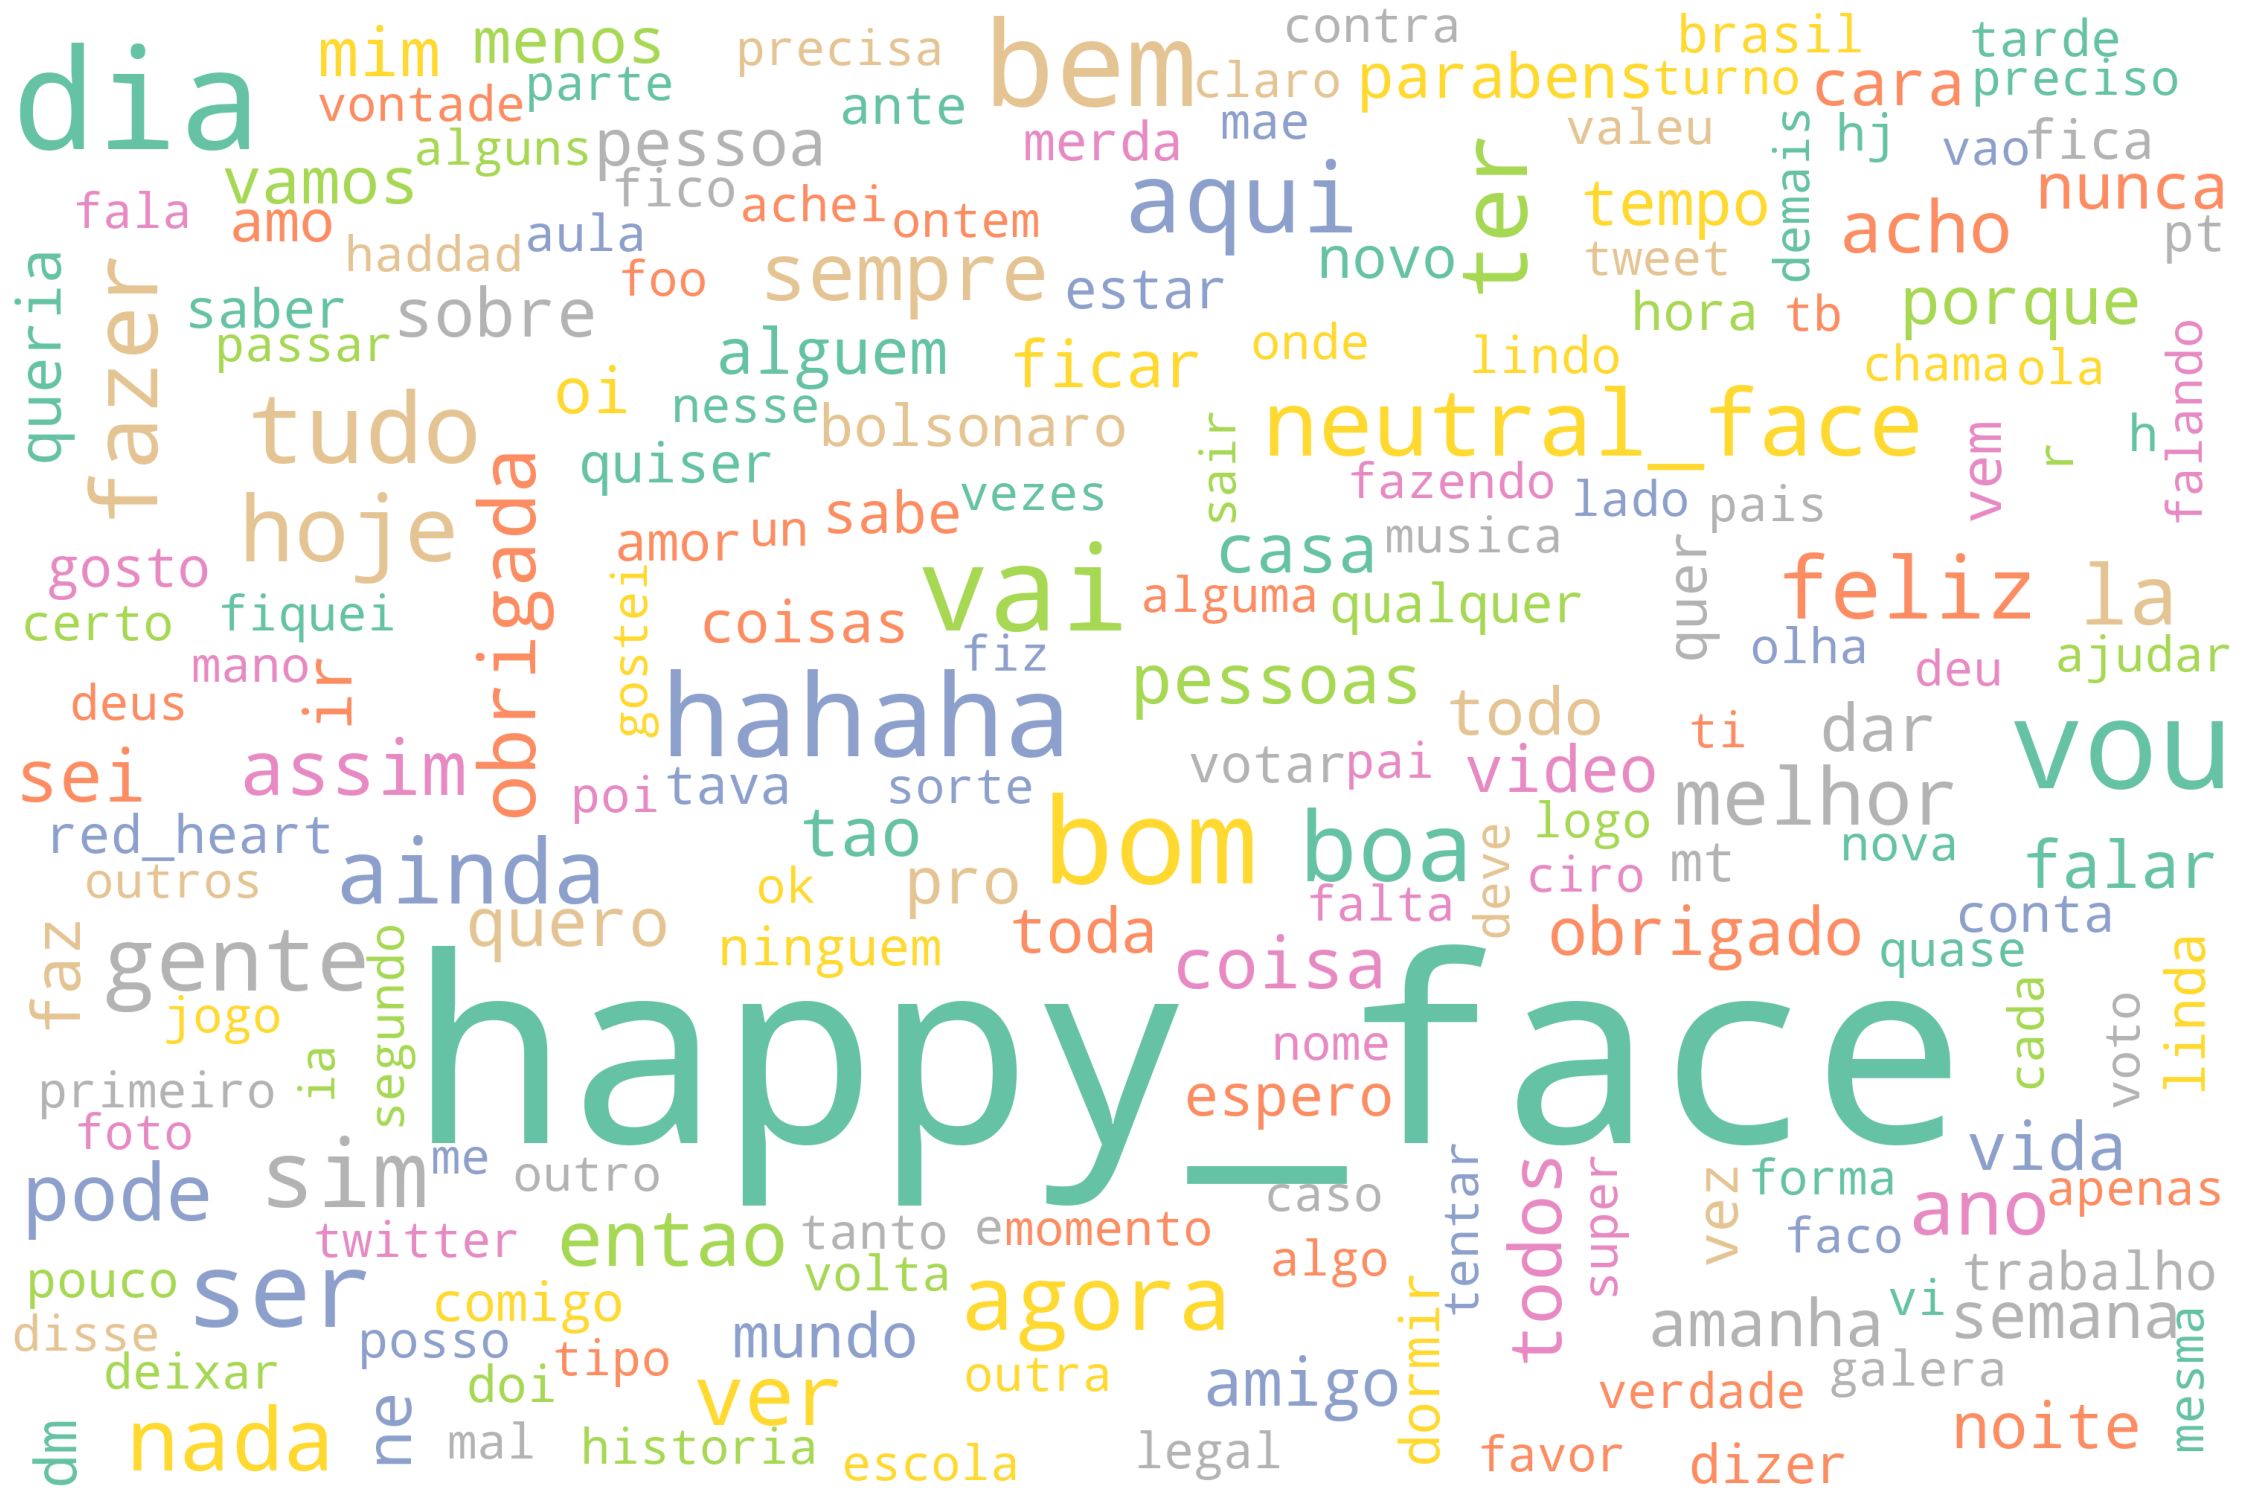

In [31]:
df_pos = df[df['sentiment'] == 1]
vocabulary_pos = pd.DataFrame(np.concatenate(df_pos['filtered_words'].values), columns=['words'])

# Generate wordcloud
wordcloud = (WordCloud(width = 3000,
                      height = 2000,
                      random_state=random_state,
                      background_color='white',
                      colormap='Set2',
                      collocations=False)
            .generate_from_frequencies(
                vocabulary_pos.groupby('words').size().sort_values(ascending=False).to_dict()
              )
            )
# Plot
plot_cloud(wordcloud)

Sentimento negativo

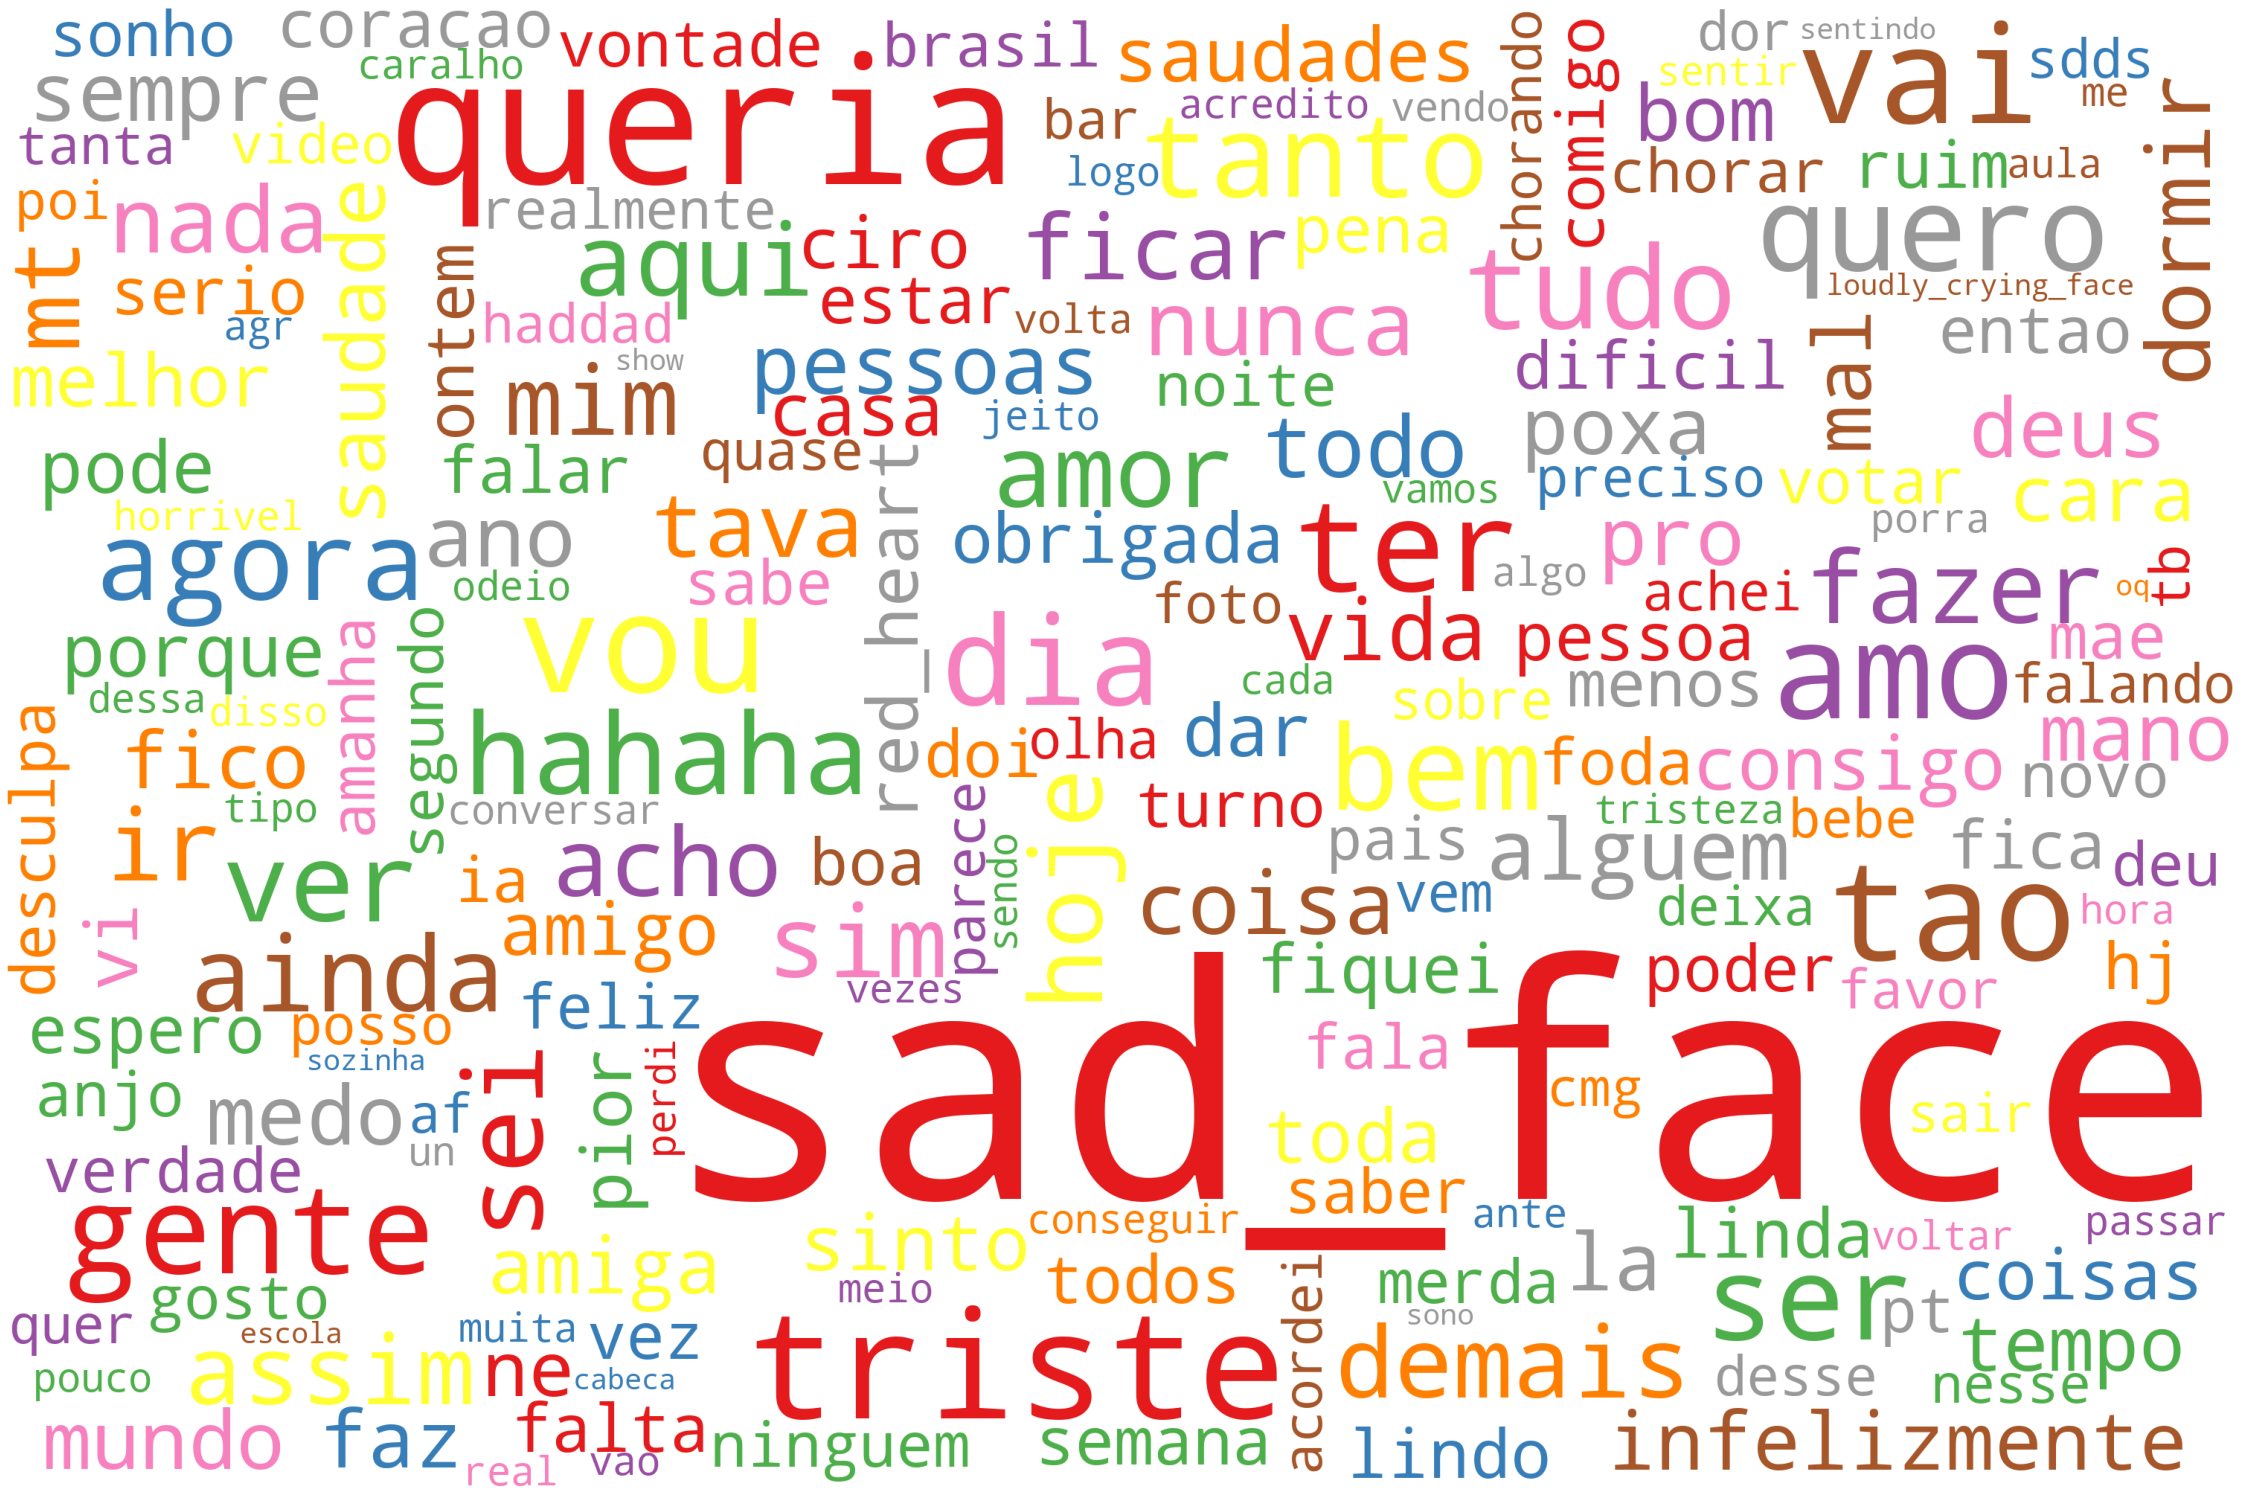

In [32]:
df_neg = df[df['sentiment'] == 0]
vocabulary_neg = pd.DataFrame(np.concatenate(df_neg['filtered_words'].values), columns=['words'])

# Generate wordcloud
wordcloud = (WordCloud(width = 3000,
                      height = 2000,
                      random_state=random_state,
                      background_color='white',
                      colormap='Set1',
                      collocations=False)
            .generate_from_frequencies(
                vocabulary_neg.groupby('words').size().sort_values(ascending=False).to_dict()
              )
            )
# Plot
plot_cloud(wordcloud)

### Descartando os emoticons

In [33]:
%%time

df_alt["filtered_words"] = df_alt['tweet_text'].apply(lambda x: preprocessing_alt(x))
df_alt['join_words'] = df_alt['filtered_words'].apply(lambda x: ' '.join(x))

Wall time: 33.8 s


In [34]:
vocabulary_alt = pd.DataFrame(
    np.concatenate(df_alt['filtered_words'].values),
    columns=['word']
)

In [35]:
vocabulary_alt.groupby('word').size().sort_values(ascending=False).head(50)

word
dia                              4792
rolling_on_the_floor_laughing    4726
trabalho                         4034
vai                              3989
fato                             3645
bolsonaro                        3411
vou                              3400
ser                              3220
bem                              3010
queria                           2921
diz                              2821
hahaha                           2720
ter                              2663
oportunidade                     2595
bom                              2499
tudo                             2425
ano                              2342
gente                            2289
aqui                             2258
agora                            2170
hoje                             2157
tao                              2127
fazer                            2106
ainda                            2060
eleicoes                         2026
sobre                            2022
triste 

#### Wordclouds

Sentimento positivo

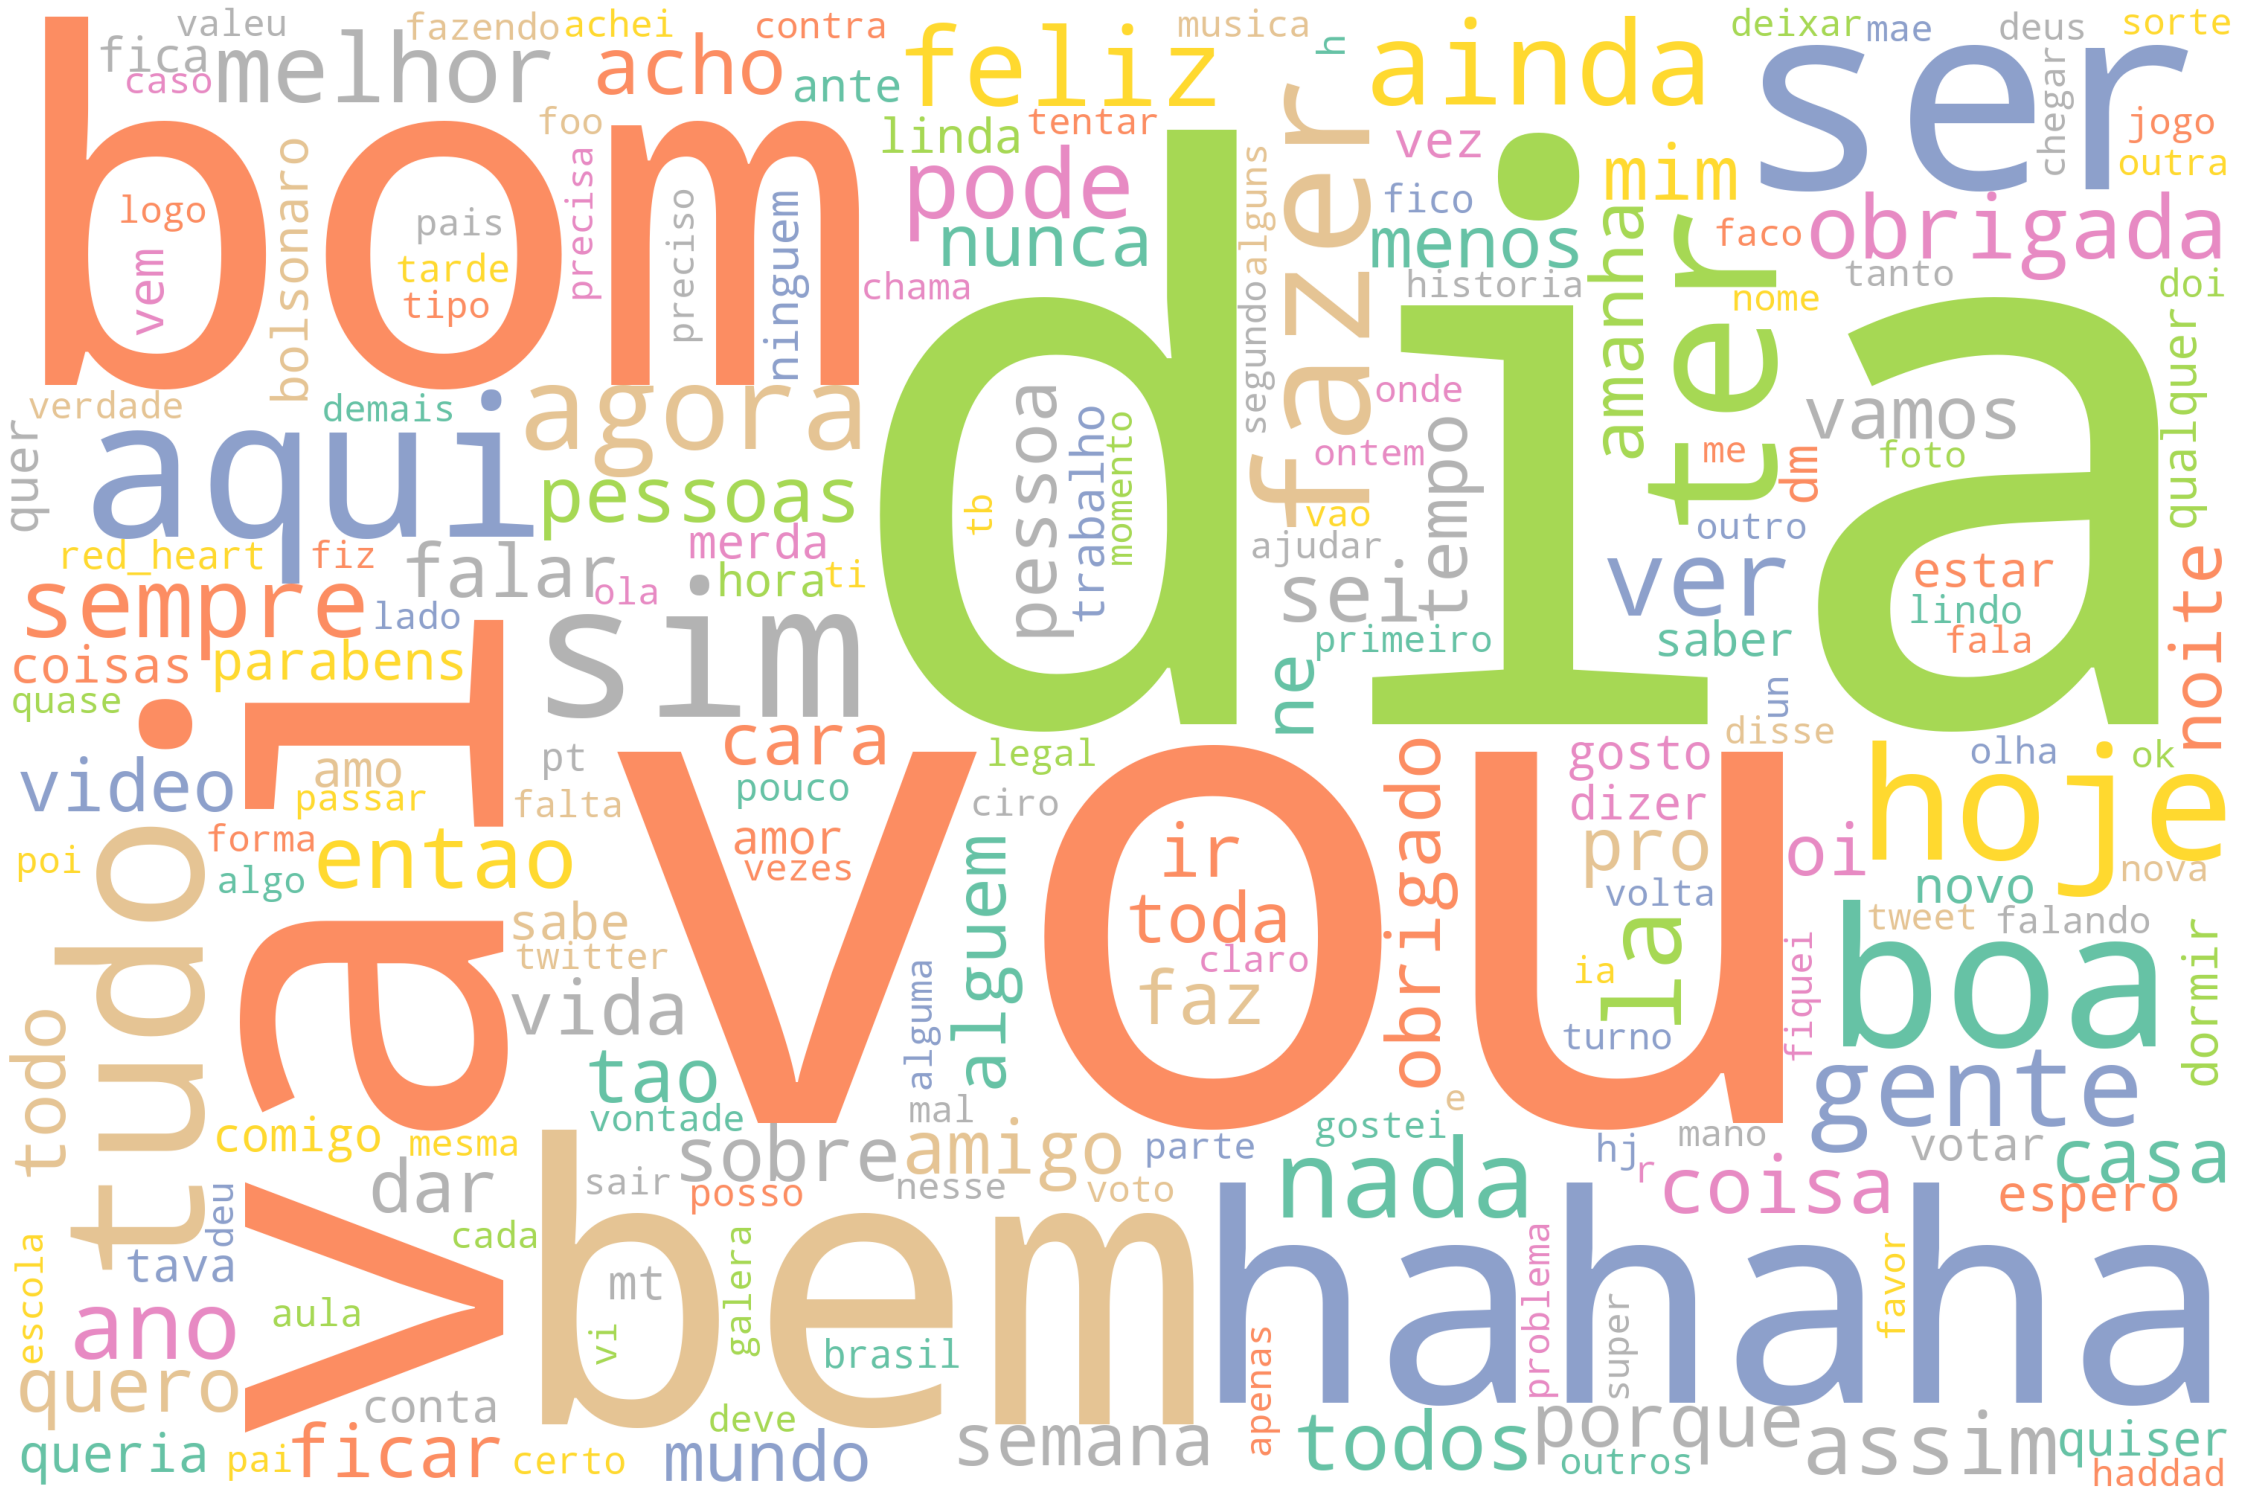

In [36]:
df_pos = df_alt[df_alt['sentiment'] == 1]
vocabulary_pos = pd.DataFrame(np.concatenate(df_pos['filtered_words'].values), columns=['words'])

# Generate wordcloud
wordcloud = (WordCloud(width = 3000,
                      height = 2000,
                      random_state=random_state,
                      background_color='white',
                      colormap='Set2',
                      collocations=False)
            .generate_from_frequencies(
                vocabulary_pos.groupby('words').size().sort_values(ascending=False).to_dict()
              )
            )
# Plot
plot_cloud(wordcloud)

Sentimento negativo

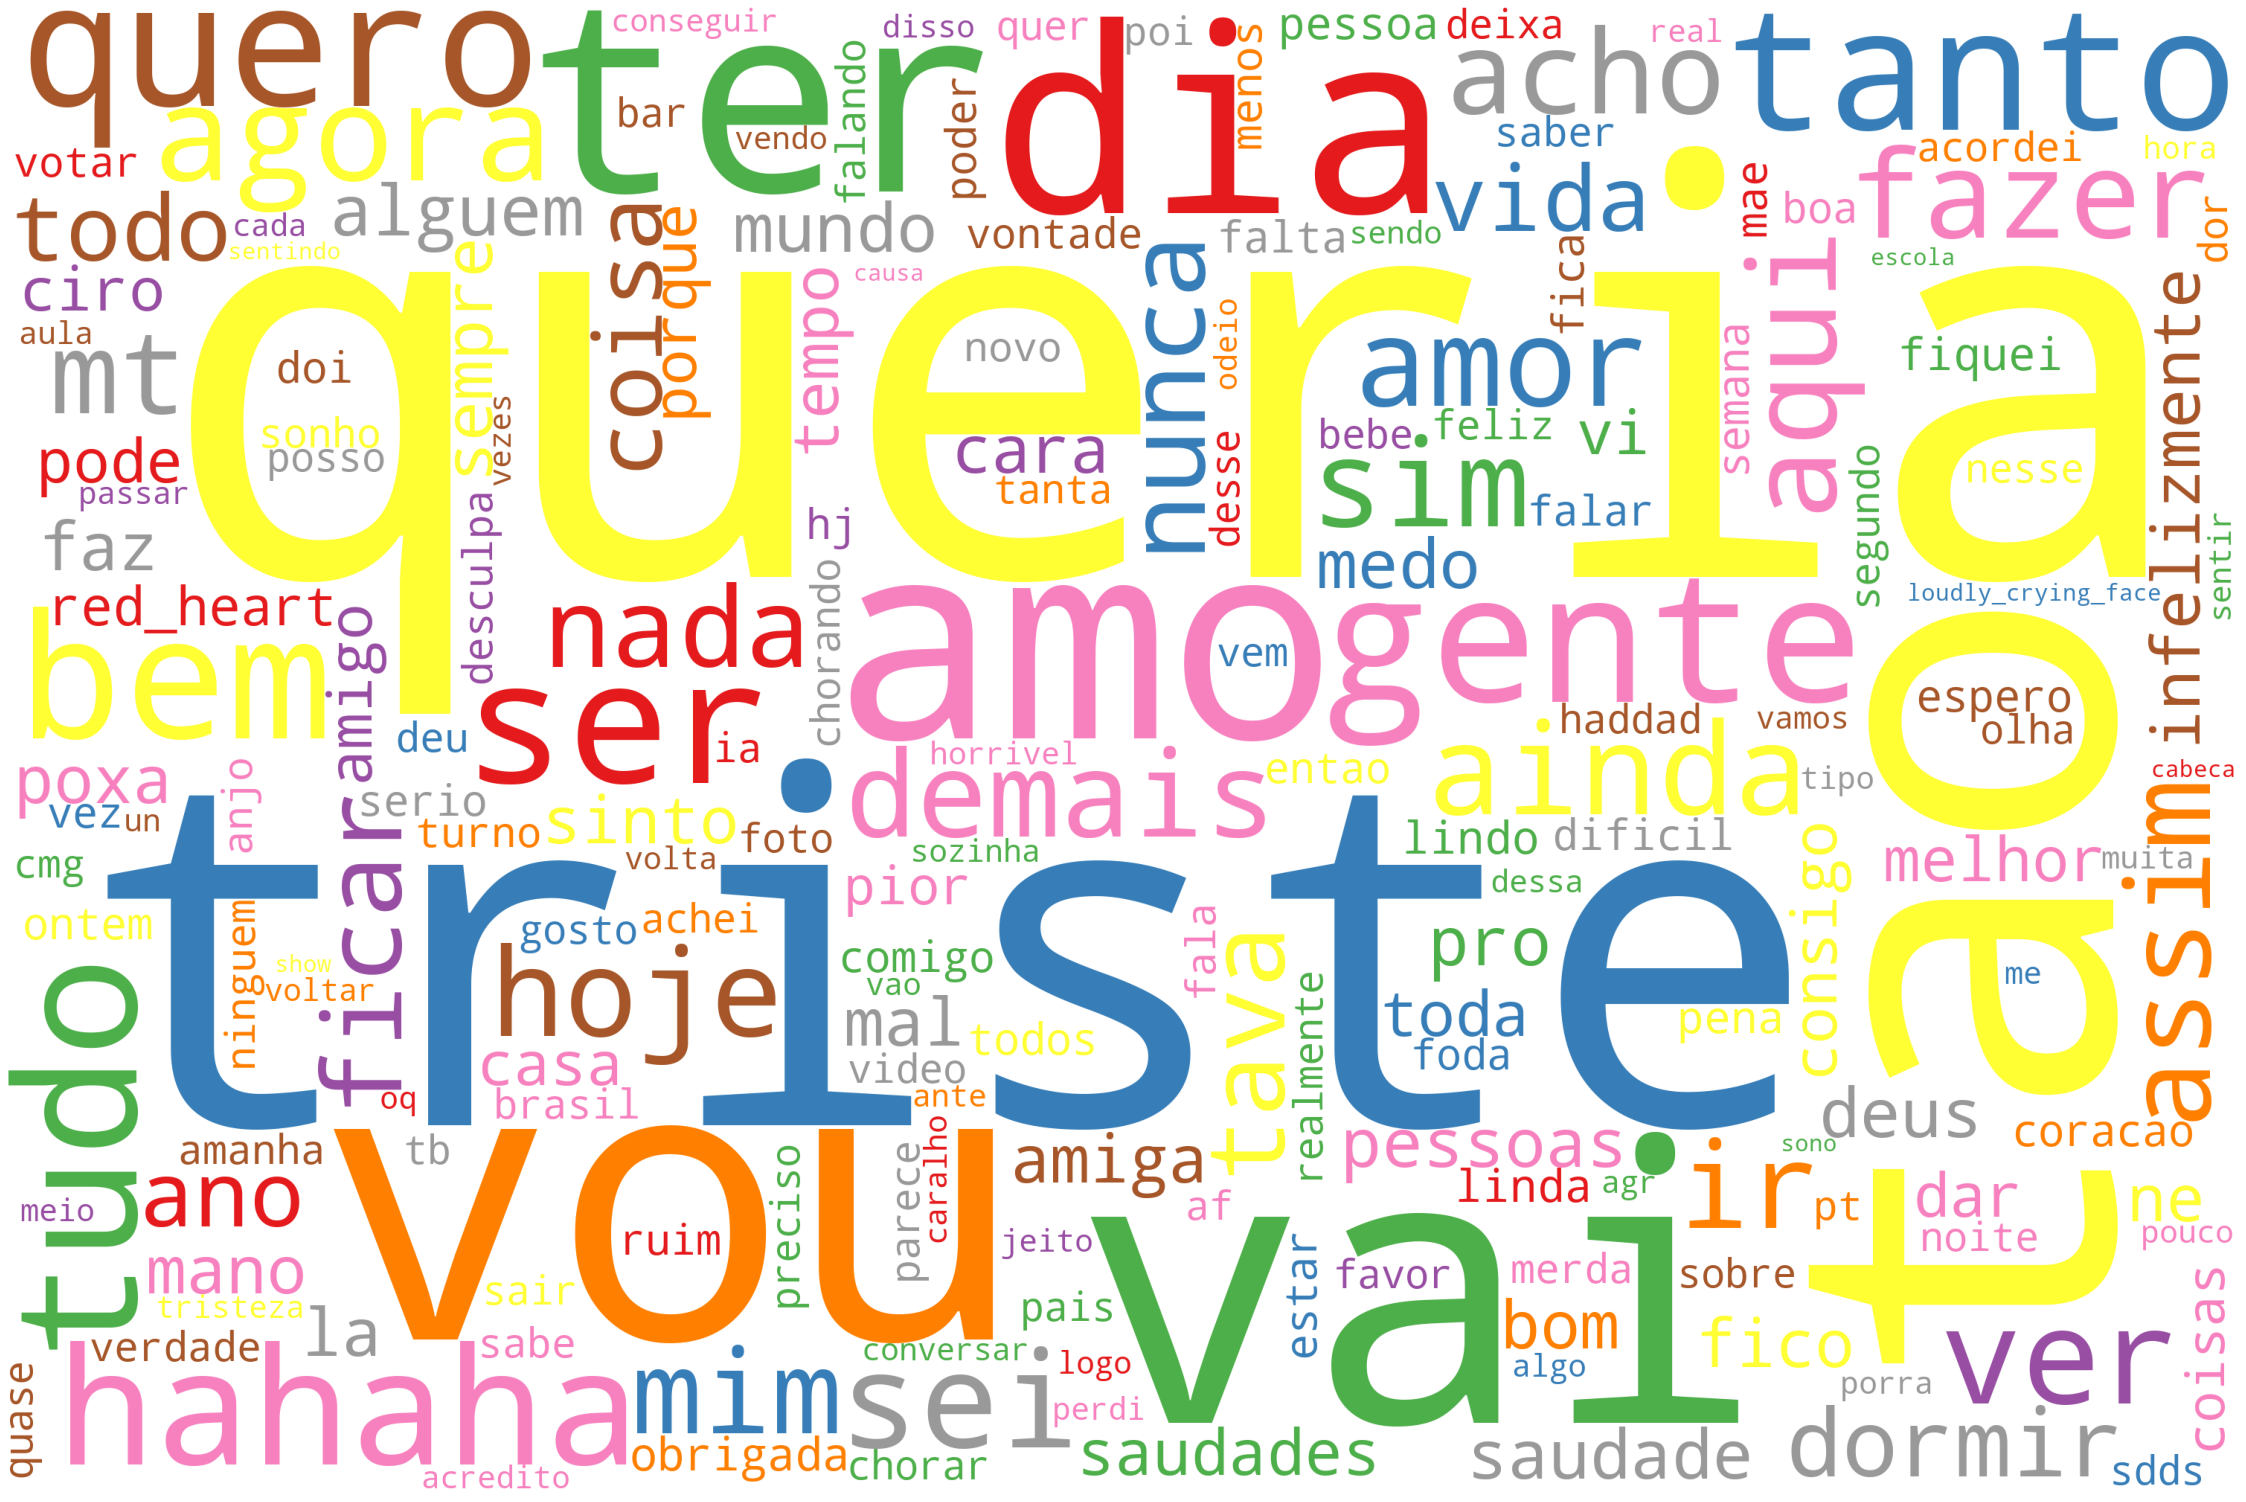

In [37]:
df_neg = df_alt[df_alt['sentiment'] == 0]
vocabulary_neg = pd.DataFrame(np.concatenate(df_neg['filtered_words'].values), columns=['words'])

# Generate wordcloud
wordcloud = (WordCloud(width = 3000,
                      height = 2000,
                      random_state=random_state,
                      background_color='white',
                      colormap='Set1',
                      collocations=False)
            .generate_from_frequencies(
                vocabulary_neg.groupby('words').size().sort_values(ascending=False).to_dict()
              )
            )
# Plot
plot_cloud(wordcloud)

É possível observar que dentre as duas abordagens, na que leva em conta os emoticons os termos que advêm deles possuem mais peso frente a todas as demais palavras/tokens, enquanto na abordagem sem os emoticons várias outras palavras agora aparecem como relevantes, portanto isso representa mais diversidade e *features* para o modelo trabalhar.

## Treinamento do modelo <a class="anchor" id="fourth-bullet"></a>

Agora que temos os dados organizados, devemos transformá-los em numéricos para treinar os modelos com eles, montando o que é denominado de Bag of Words. Para isso há diversas formas, as quais serão testadas abaixo:

#### CountVectorizer
Transformar os tokens em uma matriz de ocorrências de cada token por string.
<br>Temos dois modos:
* binary = False (somente discrimina se token aparece ou não)
* binary = True (conta a quantidade de ocorrências)

A matriz bag of words de treino, por exemplo, terá 66490 linhas e o número de colunas igual às palavras únicas do vocabulário da base de treino:

In [38]:
X = df['join_words']
y = df['sentiment']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = random_state)

In [40]:
cv = CountVectorizer(binary=False)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [41]:
X_train_cv.shape

(65928, 48125)

#### TF-IDF
Informa não só a ocorrência de cada token por string, como atribui um valor entre 0 e 1 indicando o peso/importância daquele token:

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(use_idf=True)

In [43]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

#### Modelos de aprendizado
Utilizaremos a princípio os seguintes modelos de classificação, a fim de avaliarmos sua performance inicial e escolha de um modelo baseline:
* Regressão Logística (muito recomendado e eficiente em problemas de NLP)
* Random Forest
* AdaBoost

#### Técnicas de classificação multiclasse
Há duas técnicas que podem ser aplicadas em problemas de classificação com mais de duas classes (0, 1 e 2 como o caso em questão):
* One Vs One (dados de cada classe são comparados com demais classes em pares, um de cada vez)
* One Vs Rest (dados de uma determinada classe são isolados das demais e não se faz distinção entre elas em cada classificação)

In [44]:
list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_state, multi_class='multinomial', solver = 'lbfgs', max_iter=1000)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_state)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_state)}
]

In [45]:
def test_models_report_cm(
        model_list,
        col_model_name,
        col_model,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    print("="*60)
    print("Baselines:")
    print("="*60)
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_name = mdl.get('model_name')
        print(f"Model      : {model_name}")
        print('Acurácia: ', round(metrics.accuracy_score(y_test, y_pred),4))
        print('Precision: ', round(metrics.precision_score(y_test, y_pred, average='macro'),4))
        print('Recall: ', round(metrics.recall_score(y_test, y_pred, average='macro'),4))
        print('F1-Score: ', round(metrics.f1_score(y_test, y_pred, average='macro'),4))
        print("="*30)
        

    print("="*60)
    print("One Vs One:")
    print("="*60)
    for mdl in model_list:
        model = mdl.get('estimator')
        model = OneVsOneClassifier(model).fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_name = mdl.get('model_name')
        print(f"Model      : {model_name}")        
        print('Acurácia: ', round(metrics.accuracy_score(y_test, y_pred),4))
        print('Precision: ', round(metrics.precision_score(y_test, y_pred, average='macro'),4))
        print('Recall: ', round(metrics.recall_score(y_test, y_pred, average='macro'),4))
        print('F1-Score: ', round(metrics.f1_score(y_test, y_pred, average='macro'),4))
        print("="*30)
        
    
    print("="*60)
    print("One Vs Rest:")
    print("="*60)
    for mdl in model_list:
        model = mdl.get('estimator')
        model = OneVsRestClassifier(model).fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_name = mdl.get('model_name')
        print(f"Model      : {model_name}")        
        print('Acurácia: ', round(metrics.accuracy_score(y_test, y_pred),4))
        print('Precision: ', round(metrics.precision_score(y_test, y_pred, average='macro'),4))
        print('Recall: ', round(metrics.recall_score(y_test, y_pred, average='macro'),4))
        print('F1-Score: ', round(metrics.f1_score(y_test, y_pred, average='macro'),4))
        print("="*30)

CountVectorizer:

In [46]:
%%time

test_models_report_cm(list_models,
                               "model_name",
                               "estimator",
                               X_train_cv,
                               X_test_cv,
                               y_train,
                               y_test)

Baselines:
Model      : Logistic Regression
Acurácia:  0.9823
Precision:  0.9825
Recall:  0.9824
F1-Score:  0.9824
Model      : Random Forest
Acurácia:  0.9816
Precision:  0.9816
Recall:  0.9816
F1-Score:  0.9816
Model      : AdaBoost
Acurácia:  0.9753
Precision:  0.9759
Recall:  0.9754
F1-Score:  0.9753
One Vs One:
Model      : Logistic Regression
Acurácia:  0.9823
Precision:  0.9825
Recall:  0.9824
F1-Score:  0.9823
Model      : Random Forest
Acurácia:  0.9805
Precision:  0.9805
Recall:  0.9805
F1-Score:  0.9805
Model      : AdaBoost
Acurácia:  0.9793
Precision:  0.98
Recall:  0.9794
F1-Score:  0.9794
One Vs Rest:
Model      : Logistic Regression
Acurácia:  0.9826
Precision:  0.9828
Recall:  0.9827
F1-Score:  0.9826
Model      : Random Forest
Acurácia:  0.9818
Precision:  0.9818
Recall:  0.9818
F1-Score:  0.9818
Model      : AdaBoost
Acurácia:  0.9786
Precision:  0.9794
Recall:  0.9787
F1-Score:  0.9787
Wall time: 20min 46s


TF-IDF:

In [47]:
%%time

test_models_report_cm(list_models,
                               "model_name",
                               "estimator",
                               X_train_tfidf,
                               X_test_tfidf,
                               y_train,
                               y_test)

Baselines:
Model      : Logistic Regression
Acurácia:  0.981
Precision:  0.9815
Recall:  0.9811
F1-Score:  0.9811
Model      : Random Forest
Acurácia:  0.9834
Precision:  0.9835
Recall:  0.9835
F1-Score:  0.9834
Model      : AdaBoost
Acurácia:  0.9758
Precision:  0.9763
Recall:  0.9758
F1-Score:  0.9758
One Vs One:
Model      : Logistic Regression
Acurácia:  0.9806
Precision:  0.9811
Recall:  0.9807
F1-Score:  0.9807
Model      : Random Forest
Acurácia:  0.9828
Precision:  0.983
Recall:  0.9829
F1-Score:  0.9829
Model      : AdaBoost
Acurácia:  0.9792
Precision:  0.9798
Recall:  0.9793
F1-Score:  0.9793
One Vs Rest:
Model      : Logistic Regression
Acurácia:  0.9809
Precision:  0.9814
Recall:  0.981
F1-Score:  0.981
Model      : Random Forest
Acurácia:  0.9838
Precision:  0.9839
Recall:  0.9838
F1-Score:  0.9838
Model      : AdaBoost
Acurácia:  0.979
Precision:  0.9797
Recall:  0.9791
F1-Score:  0.9791
Wall time: 21min 23s


As métricas de avaliação apontam resultados muito altos, em torno de 98% e 99%, o que considerando a complexidade de problemas de NLP e demais aspectos linguísticos, é um forte indicativo de **overfit** devido aos dados enviesados pelos *emoticons*.

Tendo isso em vista, serão executados os mesmos testes para a base **sem os emoticons**.

In [48]:
X = df_alt['join_words']
y = df_alt['sentiment']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = random_state)

In [50]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [51]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [52]:
%%time

test_models_report_cm(list_models,
                               "model_name",
                               "estimator",
                               X_train_cv,
                               X_test_cv,
                               y_train,
                               y_test)

Baselines:
Model      : Logistic Regression
Acurácia:  0.7968
Precision:  0.7982
Recall:  0.7975
F1-Score:  0.7975
Model      : Random Forest
Acurácia:  0.7563
Precision:  0.7604
Recall:  0.7572
F1-Score:  0.7561
Model      : AdaBoost
Acurácia:  0.6285
Precision:  0.7211
Recall:  0.6278
F1-Score:  0.618
One Vs One:
Model      : Logistic Regression
Acurácia:  0.7967
Precision:  0.7979
Recall:  0.7974
F1-Score:  0.7974
Model      : Random Forest
Acurácia:  0.7628
Precision:  0.7671
Recall:  0.7635
F1-Score:  0.7636
Model      : AdaBoost
Acurácia:  0.6542
Precision:  0.7378
Recall:  0.6534
F1-Score:  0.6529
One Vs Rest:
Model      : Logistic Regression
Acurácia:  0.7978
Precision:  0.7983
Recall:  0.7985
F1-Score:  0.798
Model      : Random Forest
Acurácia:  0.7658
Precision:  0.7694
Recall:  0.7667
F1-Score:  0.7654
Model      : AdaBoost
Acurácia:  0.6503
Precision:  0.7301
Recall:  0.6496
F1-Score:  0.6477
Wall time: 47min 37s


In [107]:
%%time

test_models_report_cm(list_models,
                               "model_name",
                               "estimator",
                               X_train_tfidf,
                               X_test_tfidf,
                               y_train,
                               y_test)

Baselines:
Model      : Logistic Regression
Acurácia:  0.8027
Precision:  0.8021
Recall:  0.8032
F1-Score:  0.8025
Model      : Random Forest
Acurácia:  0.7748
Precision:  0.7726
Recall:  0.7755
F1-Score:  0.7736
Model      : AdaBoost
Acurácia:  0.6302
Precision:  0.7237
Recall:  0.6295
F1-Score:  0.6133
One Vs One:
Model      : Logistic Regression
Acurácia:  0.8033
Precision:  0.8034
Recall:  0.8038
F1-Score:  0.8034
Model      : Random Forest
Acurácia:  0.7819
Precision:  0.7818
Recall:  0.7825
F1-Score:  0.7821
Model      : AdaBoost
Acurácia:  0.6638
Precision:  0.742
Recall:  0.6631
F1-Score:  0.6615
One Vs Rest:
Model      : Logistic Regression
Acurácia:  0.8028
Precision:  0.8012
Recall:  0.8034
F1-Score:  0.8021
Model      : Random Forest
Acurácia:  0.7869
Precision:  0.7846
Recall:  0.7877
F1-Score:  0.7852
Model      : AdaBoost
Acurácia:  0.6602
Precision:  0.7299
Recall:  0.6597
F1-Score:  0.6577
Wall time: 49min 41s


Desta vez, as métricas apresentam valores mais condizentes. Os modelos que apresentaram melhor resultados foram os de **regressão logística**, com ambas técnicas de One Vs One e One Vs Rest performando muito bem. Tipicamente, a metodologia **One Vs Rest** é mais recomendada, portanto seguiremos com esse adiante na tentativa de otimizá-lo ainda mais.

Quanto aos métodos *bag of words* de TF-IDF e CountVectorizer, os resultados foram praticamente os mesmos, porém dentre os dois opta-se pelo **TF-IDF** por apresentar métricas levemente superiores.

### Doc2Vec
Uma outra possível abordagem, potencialmente melhor que a tradicional *Bag of Words*, é utilizar-se de redes neurais rasas para tentar prever o contexto local e similaridade entre as palavras antes de aplicar os modelos, utilizando as metodologias Word2Vec ou Doc2Vec. 

Neste caso, prefere-se o **Doc2Vec** pois além de analisar cada palavra e sua posição para determinar o contexto, ele leva em consideração todo o documento (neste caso todo o *tweet*), o que acaba sendo uma abordagem mais completa e recorrente em análise de sentimentos.

In [114]:
# necessário alterar o X_train pois o modelo Doc2Vec recebe uma lista de tokens

X = df['filtered_words']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = random_state)



In [71]:
def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        return list_sentences

    else:
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))
    return lista

In [115]:
train_corpus = read_corpus(X_train)
test_corpus = read_corpus(X_test, tokens_only=True)

In [116]:
model = doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=20)
#model = doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)

In [117]:
model.build_vocab(train_corpus)

In [118]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [119]:
%%time
X_train_d2v = np.array(list(map(model.infer_vector, X_train)))

Wall time: 1min 46s


In [120]:
%%time
X_test_d2v = np.array(list(map(model.infer_vector, X_test)))

Wall time: 44.6 s


Treinando os mesmos modelos anteriores:

In [121]:
list_models

[{'model_name': 'Logistic Regression',
  'estimator': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)},
 {'model_name': 'Random Forest',
  'estimator': RandomForestClassifier(random_state=42)},
 {'model_name': 'AdaBoost', 'estimator': AdaBoostClassifier(random_state=42)}]

In [133]:
%%time

test_models_report_cm(list_models,
                               "model_name",
                               "estimator",
                               X_train_d2v,
                               X_test_d2v,
                               y_train,
                               y_test)

Baselines:
Model      : Logistic Regression
Acurácia:  0.8354
Precision:  0.8357
Recall:  0.8353
F1-Score:  0.8354
Model      : Random Forest
Acurácia:  0.8279
Precision:  0.8281
Recall:  0.8281
F1-Score:  0.828
Model      : AdaBoost
Acurácia:  0.734
Precision:  0.7341
Recall:  0.734
F1-Score:  0.7338
One Vs One:
Model      : Logistic Regression
Acurácia:  0.8379
Precision:  0.838
Recall:  0.8378
F1-Score:  0.8379
Model      : Random Forest
Acurácia:  0.8295
Precision:  0.8296
Recall:  0.8297
F1-Score:  0.8296
Model      : AdaBoost
Acurácia:  0.7758
Precision:  0.7758
Recall:  0.7758
F1-Score:  0.7757
One Vs Rest:
Model      : Logistic Regression
Acurácia:  0.8335
Precision:  0.8335
Recall:  0.8333
F1-Score:  0.8334
Model      : Random Forest
Acurácia:  0.8372
Precision:  0.8376
Recall:  0.8374
F1-Score:  0.8372
Model      : AdaBoost
Acurácia:  0.7794
Precision:  0.7797
Recall:  0.7793
F1-Score:  0.7793
Wall time: 53min 43s


Matriz de confusão para a Regressão Logística:

In [134]:
#list_models[0]['estimator'].fit(X_train_d2v, X_test_d2v)
y_pred = list_models[0]['estimator'].predict(X_test_d2v)

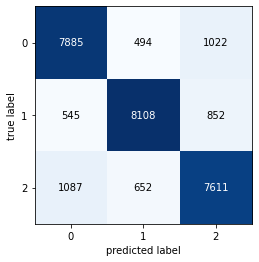

In [136]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

Aplicando a estratégia **OneVsRest**:

In [85]:
model = LogisticRegression(random_state = random_state, multi_class='multinomial', max_iter=1000)
model = OneVsRestClassifier(model).fit(X_train_d2v, y_train)
y_pred = model.predict(X_test_d2v)

print(f"Model      : Logistic Rregression")        
print('Acurácia: ', round(metrics.accuracy_score(y_test, y_pred),4))
print('Precision: ', round(metrics.precision_score(y_test, y_pred, average='macro'),4))
print('Recall: ', round(metrics.recall_score(y_test, y_pred, average='macro'),4))
print('F1-Score: ', round(metrics.f1_score(y_test, y_pred, average='macro'),4))
print("="*30)

Model      : Logistic Rregression
Acurácia:  0.8333
Precision:  0.8333
Recall:  0.8332
F1-Score:  0.8332


Conforme esperado, a abordagem Doc2Vec apresentou resultados superiores às anteriores, e portanto será a mais indicada nesse caso. Prosseguimos agora para validação cruzada e otimização do modelo.

### Cross-validation (validação cruzada)
Aplica-se validação cruzada apenas para verificar se a acurácia e métricas obtidas anteriormente não foram simplemente ao acaso devido à divisão da base de treino/teste. Aplica-se 5 *folds* por padrão, e as métricas do tipo "macro" para dar a mesma importância para todas as classes.

In [86]:
%%time

eval_metrics = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']
cvs = cross_val_score(model, X_train_d2v, y_train, scoring='accuracy', cv=5)
print(cvs)
cross_val = cross_validate(model, X_train_d2v, y_train,scoring=eval_metrics, cv=5)
pprint(cross_val)

[0.82655847 0.83315638 0.82390414 0.82798635 0.83064088]
{'fit_time': array([38.50676656, 36.77391601, 41.22186494, 42.18009067, 41.41366434]),
 'score_time': array([0.12575459, 0.12802577, 0.13128567, 0.15082932, 0.14282131]),
 'test_accuracy': array([0.82655847, 0.83315638, 0.82390414, 0.82798635, 0.83064088]),
 'test_f1_macro': array([0.8268665 , 0.83319819, 0.82431604, 0.82830894, 0.83076933]),
 'test_precision_macro': array([0.82725021, 0.83308675, 0.82480902, 0.82856474, 0.83081753]),
 'test_recall_macro': array([0.82666901, 0.83335715, 0.82401182, 0.82812293, 0.83081863])}
Wall time: 6min 33s


In [87]:
pd.DataFrame(
    {
        'acc': cross_val['test_accuracy'],
        'precision': cross_val['test_precision_macro'],
        'recall': cross_val['test_recall_macro'],
        'F1': cross_val['test_f1_macro']}
).describe().T[['mean', '50%', 'std', 'min', 'max']]

mean       50%       std       min       max
acc        0.828449  0.827986  0.003585  0.823904  0.833156
precision  0.828906  0.828565  0.003193  0.824809  0.833087
recall     0.828596  0.828123  0.003625  0.824012  0.833357
F1         0.828692  0.828309  0.003437  0.824316  0.833198

### Otimização de Hiperparâmetros
A regressão logística não apresenta muitas opções de hiperparâmetro para *tuning*, especialmente considerando que o resultado que já obtemos anteriormente é satisfatório. Apesar disso, utiliza-se o RandomizedSearch abaixo para testar a combinação entre algumas opções de hiperparâmetros:

In [90]:
model = OneVsRestClassifier(LogisticRegression(random_state=random_state))

pprint("Parâmetros da LogisticRegression:")
pprint(model.get_params())

'Parâmetros da LogisticRegression:'
{'estimator': LogisticRegression(random_state=42),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 42,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': None}


In [91]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

params_grid = {
    'estimator__solver': solvers,
    'estimator__penalty': penalty,
    'estimator__C': c_values
}
pprint(params_grid)

{'estimator__C': [100, 10, 1.0, 0.1, 0.01],
 'estimator__penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear']}


In [92]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [93]:
%%time

random_search.fit(X_train_d2v, y_train)
print(random_search.cv_results_['mean_test_score'].mean())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83641245 0.7804878         nan        nan        nan
        nan        nan 0.84307123        nan]
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


nan
Wall time: 5min 21s


C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [94]:
random_search.best_params_

{'estimator__solver': 'newton-cg',
 'estimator__penalty': 'l2',
 'estimator__C': 100}

In [97]:
model_rs = LogisticRegression(solver='newton-cg',penalty='l2',C=100)

model_rs = OneVsRestClassifier(model_rs).fit(X_train_d2v, y_train)
y_pred_rs = model_rs.predict(X_test_d2v)

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserW

In [100]:
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall: ', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1-Score: ', metrics.f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Acurácia:  0.8333451302378256
Precision:  0.8332923541966769
Recall:  0.8331926811460214
F1-Score:  0.8331684577402966
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      9401
           1       0.87      0.86      0.86      9505
           2       0.81      0.80      0.80      9350

    accuracy                           0.83     28256
   macro avg       0.83      0.83      0.83     28256
weighted avg       0.83      0.83      0.83     28256



Obteve-se assim uma acurácia final média de **83%**.

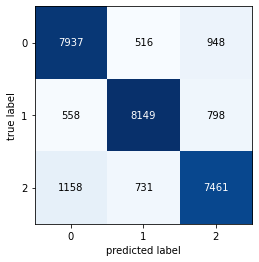

In [103]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

Percebe-se que o ganho das métrica não foi muito expressivo em após a otimização dos hiperparâmetros, mas é perceptível a melhora quando passamos a utilizar o modelo Doc2Vec.

Dentre todas as classes, o modelo final é mais especialista em classificar corretamente os sentimentos positivos, apesar das outras estarem bem próximas.

## Executando a base de validação

In [138]:
df_sub = pd.read_csv('Subm3Classes.csv', index_col=0)
df_sub.head()

tweet_text  \
id                                                                       
1046764676707753987  Apartamento Vila Mariana Praça Monteiro dos Sa...   
1047329264943751169  @FalleNCS @BrasilGameShow quero 1x1 de scout. ...   
1045443874947313665  mais uma analógica no correio à minha espera :...   
1040484298711814144  Em festa de posse como presidente do STF, Toff...   
1045411876887306240  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...   

                                         tweet_date query_used  
id                                                              
1046764676707753987  Mon Oct 01 14:12:01 +0000 2018         :)  
1047329264943751169  Wed Oct 03 03:35:29 +0000 2018         :)  
1045443874947313665  Thu Sep 27 22:43:37 +0000 2018         :)  
1040484298711814144  Fri Sep 14 06:16:02 +0000 2018      folha  
1045411876887306240  Thu Sep 27 20:36:28 +0000 2018         :)

In [139]:
df_sub["filtered_words"] = df_sub['tweet_text'].apply(lambda x: preprocessing_alt(x))
df_sub['join_words'] = df_sub['filtered_words'].apply(lambda x: ' '.join(x))

X_sub = df_sub['filtered_words']

In [143]:
train_corpus = read_corpus(X_sub)

In [144]:
model = doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=20)

In [145]:
model.build_vocab(train_corpus)

In [146]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [147]:
%%time
X_train_sub_d2v = np.array(list(map(model.infer_vector, X_sub)))

Wall time: 7.17 s


In [148]:
y_pred_sub = model_rs.predict(X_train_sub_d2v)

In [149]:
df_sub['sentiment_predict'] = y_pred_sub
df_sub.head()

tweet_text  \
id                                                                       
1046764676707753987  Apartamento Vila Mariana Praça Monteiro dos Sa...   
1047329264943751169  @FalleNCS @BrasilGameShow quero 1x1 de scout. ...   
1045443874947313665  mais uma analógica no correio à minha espera :...   
1040484298711814144  Em festa de posse como presidente do STF, Toff...   
1045411876887306240  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...   

                                         tweet_date query_used  \
id                                                               
1046764676707753987  Mon Oct 01 14:12:01 +0000 2018         :)   
1047329264943751169  Wed Oct 03 03:35:29 +0000 2018         :)   
1045443874947313665  Thu Sep 27 22:43:37 +0000 2018         :)   
1040484298711814144  Fri Sep 14 06:16:02 +0000 2018      folha   
1045411876887306240  Thu Sep 27 20:36:28 +0000 2018         :)   

                                                        filtered_words  \
id                                                                       
1046764676707753987  [apartamento, vila, mariana, praca, monteiro, ...   
1047329264943751169  [quero, x, scout, dizem, dou, muita, bala, cag...   
1045443874947313665  [analogica, correio, espera, falta, receber, d...   
1040484298711814144  [festa, posse, presidente, stf, toffoli, canta...   
1045411876887306240                                   [flavia, tuiter]   

                                                            join_words  \
id                                                                       
1046764676707753987  apartamento vila mariana praca monteiro santos...   
1047329264943751169          quero x scout dizem dou muita bala cagada   
1045443874947313665  analogica correio espera falta receber duas le...   
1040484298711814144  festa posse presidente stf toffoli canta legia...   
1045411876887306240                                      flavia tuiter   

                     sentiment_predict  
id                                      
1046764676707753987                  1  
1047329264943751169                  0  
1045443874947313665                  1  
1040484298711814144                  1  
1045411876887306240                  2

In [157]:
df_sub[['sentiment_predict']].to_csv('victor_reis_781_projeto_2_submissao.csv', index=True)

## Conclusões <a class="anchor" id="fifth-bullet"></a>

Conclui-se que o modelo apresentou ótimas métricas, corroborado pelo fato de termos tratados os emojis e emoticons, padronizando-os em strings comuns, que por sua vez estão presentes com muito peso nas *wordclouds*.

Outro fato é que o modelo de **Regressão Logística** apresentou os melhores resultados, o que é esperado para esse tipo de problema de processamento de linguagem natural.

Ambas abordagens de *bag of words* apresentam boas métricas. Dentre as técnicas de transformação de tokens para alimentar o modelo, prefere-se a **Doc2Vec**, uma vez que apresentou melhoria nas acurácia e demais métricas. A combinação de OneVsRest com o modelo de regressão logística com a base de treino transformada a partir do Doc2Vec foi a configuração que apresentou os melhores resultados.

Se fosse necessário outras abordagens ou melhorias, talvez fosse relevante testar outra técnicas no pré-processamento, que é a etapa mais importante nesse tipo de problema, como a lib *spacy* na construção do *corpus*.

Este modelo a princípio funcionaria relativamente bem para indicar sentimentos de comentários e frases curtas e informais, podendo ser aplicado em sites de notícias, comentários ao vivo de livestreams, vídeos, dentre outros. Caso o contexto fuja um pouco dessa especificação, provavelmente seria preciso ajustes e melhorias também na etapa de pré-processamento, pois a modelagem em si não é muito complexa e não apresenta muitas opções de melhoria.

[Voltar ao início](#first-bullet)